In [1]:
import os
import sys

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_model_with_attention

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'inception_dealing_with_imbalance_3_whole_model_trainable_with_attention_module_on_top'

In [3]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 9 classes.
Found 2000 files belonging to 9 classes.
Epoch 1/100
63/63 [==============================] - ETA: 0s - loss: 1.0345 - categorical cross entropy: 1.0705 - mean squared error: 0.0522 - accuracy: 0.6525 - auc: 0.5860 - prc: 0.1825

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_3_whole_model_trainable_with_attention_module_on_top_1_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_3_whole_model_trainable_with_attention_module_on_top_1_1\assets


63/63 [==============================] - 126s 2s/step - loss: 1.0345 - categorical cross entropy: 1.0705 - mean squared error: 0.0522 - accuracy: 0.6525 - auc: 0.5860 - prc: 0.1825 - val_loss: 1.6841 - val_categorical cross entropy: 1.6841 - val_mean squared error: 0.0843 - val_accuracy: 0.6705 - val_auc: 0.3899 - val_prc: 0.1124 - lr: 0.0010
Epoch 2/100
63/63 [==============================] - ETA: 0s - loss: 0.7550 - categorical cross entropy: 0.7550 - mean squared error: 0.0406 - accuracy: 0.7174 - auc: 0.6886 - prc: 0.3008

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_3_whole_model_trainable_with_attention_module_on_top_1_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_3_whole_model_trainable_with_attention_module_on_top_1_2\assets


63/63 [==============================] - 95s 2s/step - loss: 0.7550 - categorical cross entropy: 0.7550 - mean squared error: 0.0406 - accuracy: 0.7174 - auc: 0.6886 - prc: 0.3008 - val_loss: 1.3006 - val_categorical cross entropy: 1.3006 - val_mean squared error: 0.0625 - val_accuracy: 0.6685 - val_auc: 0.5165 - val_prc: 0.1492 - lr: 0.0010
Epoch 3/100
63/63 [==============================] - 36s 563ms/step - loss: 0.6670 - categorical cross entropy: 0.6670 - mean squared error: 0.0363 - accuracy: 0.7553 - auc: 0.7088 - prc: 0.3554 - val_loss: 5.8838 - val_categorical cross entropy: 5.8838 - val_mean squared error: 0.1391 - val_accuracy: 0.3120 - val_auc: 0.5288 - val_prc: 0.1897 - lr: 0.0010
Epoch 4/100
63/63 [==============================] - ETA: 0s - loss: 0.5895 - categorical cross entropy: 0.5895 - mean squared error: 0.0325 - accuracy: 0.7880 - auc: 0.7250 - prc: 0.4307

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_3_whole_model_trainable_with_attention_module_on_top_1_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_3_whole_model_trainable_with_attention_module_on_top_1_4\assets


63/63 [==============================] - 95s 2s/step - loss: 0.5895 - categorical cross entropy: 0.5895 - mean squared error: 0.0325 - accuracy: 0.7880 - auc: 0.7250 - prc: 0.4307 - val_loss: 0.7464 - val_categorical cross entropy: 0.7464 - val_mean squared error: 0.0401 - val_accuracy: 0.7370 - val_auc: 0.6944 - val_prc: 0.3968 - lr: 0.0010
Epoch 5/100
63/63 [==============================] - 36s 561ms/step - loss: 0.4919 - categorical cross entropy: 0.4919 - mean squared error: 0.0269 - accuracy: 0.8299 - auc: 0.7393 - prc: 0.4917 - val_loss: 0.9435 - val_categorical cross entropy: 0.9435 - val_mean squared error: 0.0440 - val_accuracy: 0.7315 - val_auc: 0.6625 - val_prc: 0.3513 - lr: 0.0010
Epoch 6/100
63/63 [==============================] - 35s 562ms/step - loss: 0.4196 - categorical cross entropy: 0.4196 - mean squared error: 0.0231 - accuracy: 0.8539 - auc: 0.7491 - prc: 0.5343 - val_loss: 0.9267 - val_categorical cross entropy: 0.9267 - val_mean squared error: 0.0522 - val_accu

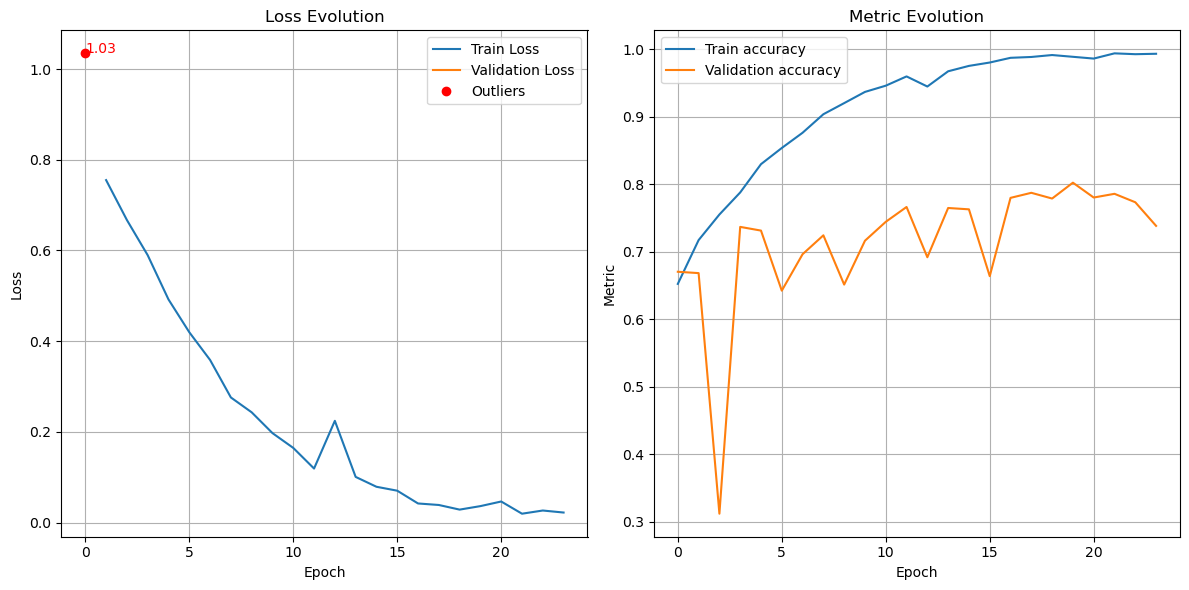

In [5]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes: lambda: get_model_with_attention(HEIGHT, WIDTH, num_classes, metrics=METRICS),
    get_augmentation_layers,
    batch_size=128)